###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2019 L.A. Barba, N.C. Clementi

# From waves to Fourier

This notebook is based on a chapter one of the book *Fourier Analysis an Introduction* by E.M Stein and R. Shakarchi. 

The development of Fourier Analysis started by the investigation of the problem of vibrating string and heat flow. The differential equations that describe these two phenomena were solved in what we know today as **Fourier Series**. 

For the purpose of this notebook, we will concentrate in understanding waves and how their study lead to Fourier Analysis. 


## Vibrating strings

### Simple harmonic motion

In the module [EngComp3_flyatchange](https://openedx.seas.gwu.edu/courses/course-v1:GW+EngComp3+2018/about) we studied the *Simple harmonic motion* which describes how simple oscillators, such us a mass attached to a horizontal spring, behave.

This problem is represented by the equation:

\begin{equation}
    y''(t) + c^2 y(t) = 0
\end{equation}

where $c = \sqrt{k/m}$. The general solution of this problem takes the form:

\begin{equation}
    y(t) = a \text{cos}(ct) + b\text{sin}(ct) 
\end{equation}

with $a$ and $b$ constants that will be determined by the initial conditions. Due to the beauty of trigonometric equations, the general solution can be rewritten as:

\begin{equation}
    a\text{cos}(ct) + b\text{sin}(ct) = A\text{cos}(ct-\varphi)
\end{equation}

where  $A = \sqrt{a^2 + b^2}$ is the "amplitude" of the motion, $c$ is the "natural frequency", $\varphi$ its known as the "phase", and $2\pi/c$ is the period of the motion. 

To visualize how a this wave looks like we will plot the following function for different values of $A$ and $\varphi$. For now we will use $c=1$

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

pyplot.rc('font', family='serif', size=16)

In [2]:
def wave(A, phi, t):
    """
    Computes a function Acos(ct-phi) with c=1
    
    Arguments:
    A  : float, amplitude.
    phi: float, phase (angle in radiands)
    t  : array, time. 
    """
    
    y = A * numpy.cos(t - phi)
    
    return y
    

In [3]:
time = numpy.linspace(0, 4*numpy.pi, 81) 

In [4]:
#This values will just plot a cosine
Ao = 1
phio = 0

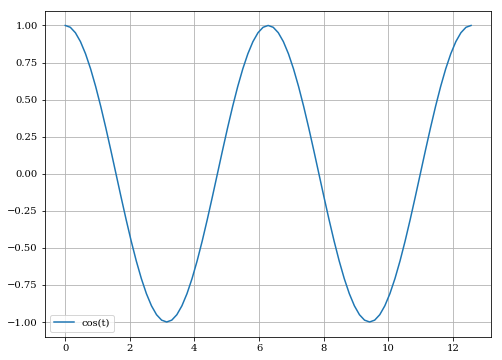

In [5]:
pyplot.figure(figsize=(8,6))

pyplot.plot(time, wave(Ao, phio, time), label='cos(t)')
## Add a line here to plot with different values of A and phi

pyplot.legend()
pyplot.grid();

##### Exercise:
Rewrite the wave function to accept different values of $c$ and make some plots to see how it behaves.

### Standing and traveling waves

We can describe vibrating strings using one dimensional wave motions. We will describe two kinds of motions:

**Standing waves**

Wavelike motions described by functions of the way $y=u(x,t)$, that can be separate into $u(x,t) = \varphi(x) \psi(t)$. We can think of this as, $\varphi(x)$ being the initial profile of the wave at $t=0$, and $\psi(t)$ an amplifying fact that depends on time. 

Note that the way standing waves look like, suggest the mathematical idea of "separation of variables". We will come back to this later. 

<img src="../images/standing_wave.png" style="width: 400px;"/>

##### Standing wave at $t=0$ and $t=t_0$

* Traveling waves

In this case we have an initial profile $F(x)$ such that $u(x,t)$ is equal to $F(x)$ when $t=0$. As we move in time, this profile moves to the right by $ct$ units, where $c>0$ is the *velocity*:

\begin{equation}
    u(x,t) =  F(x - ct)
\end{equation}


<img src="../images/travelling_wave.png" style="width: 500px;"/>

##### Traveling wave at $t=0$ and $t=t_0$

## The wave equation

\begin{equation}
    \frac{1}{c^2}\frac{\partial^2u}{\partial t^2} = \frac{\partial^2u}{\partial x^2}
\end{equation}

This equation is known as the one-dimensional wave equation, where $c>0$ is the **velocity** of the motion. We can simplify the wave equation by performing a nondimensionalization, if we say $x=aX$ and $t=bT$ by choosing the appropriate $a$ and $b$ we can transform the wave equation as: 

\begin{equation}
    \frac{\partial^2u}{\partial T^2} = \frac{\partial^2u}{\partial X^2}
\end{equation}

Once we find the solution we can return to the original system by making the inverse change of variables. 

### Solution of the wave equation

After seeing how standing waves behave we will look at solutions which are of the form $\varphi(x)\psi(t)$. We will use separation of variables and construct solutions that are pure tones. Then since the wave equation is linear, if $u(x,t)$ and $v(x,t)$ are particular solutions, then $au(x,t) +bv(x,t)$ it is also a solution where $a$ and $b$ are any constants, we will combine this pure tones into a more complex complex combination. Ultimately, we will be able to express the general solution in terms of a sum of all this particular solutions. 

Note that if you look at the equation, one side only requires differentiation in $t$, while the other only on $x$. This is another reason to look for solutions of the form $u(x,t) = \varphi(x)\psi(t)$. If we assume that $u(x,t)$ takes this form and we differentiate, we get:

\begin{equation}
    \varphi(x)\psi''(t) = \varphi''(x)\psi(t)
\end{equation}

and therefore

\begin{equation}
    \frac{\psi''(t)}{\psi(t)} = \frac{\varphi''(x)}{\varphi(x)}
\end{equation}

You can notice that the left side only depends on $t$ while the right hand side only depends on $x$. This can only happen if both sides are equal to a constant, let's say $\lambda$. Then, we can write:

\begin{align}
    \psi''(t) - \lambda\psi(t)&= 0 \\
    \varphi''(x)-\lambda\varphi(x) &= 0
\end{align}
 

If you remember, these ones look a lot like the equation from simple harmonic motion. We will only consider the case where $\lambda < 0$, since $\lambda >= 0$ the solution won't oscillate. Rewriting $\lambda = -m^2$, the solution is given by:

\begin{equation}
    \psi(t) = A\text{cos}(mt) + B\text{sin}(mt)
\end{equation}

and similarly:

\begin{equation}
    \varphi(x) = \tilde{A}\text{cos}(mx) + \tilde{B}\text{sin}(mx)
\end{equation}

Since we are thinking that the string is fixed at $x=0$ and $x=\pi$ then $\varphi(0)=\varphi(\pi) = 0$.  This tells us that $\tilde{A}=0$, and $\tilde{B} \neq 0$, then $m$ must be an integer.

For $m=0$ the solution vanishes and for $m <= -1$ we can simply rename our constants. Then we will concentrate in the case $m => 1$, and we can then say that for each $m => 1$, 

\begin{equation}
    u_m(x,t) = \left( A_m\text{cos}mt + B_m\text{sin}mt \right)\text{sin}mx 
\end{equation}

which is a **standing wave**, is a solution to the wave equation.

Before we keep going with the analysis of the wave equation, let's discuss a bit more about standing waves. The terms comes from looking at the shape of $u_m(x,t)$ at each fixed time $t$. 

If you remember, these ones look a lot like the equation from simple harmonic motion. We will only consider the case where $\lambda < 0$, since $\lambda >= 0$ the solution won't oscillate. Rewriting $\lambda = -m^2$, the solution is given by:

\begin{equation}
    \psi(t) = A\text{cos}(mt) + B\text{sin}(mt)
\end{equation}

and similarly:

\begin{equation}
    \varphi(x) = \tilde{A}\text{cos}(mx) + \tilde{B}\text{sin}(mx)
\end{equation}

Since we are thinking that the string is fixed at $x=0$ and $x=\pi$ then $\varphi(0)=\varphi(\pi) = 0$.  This tells us that $\tilde{A}=0$, and $\tilde{B} \neq 0$, then $m$ must be an integer.

For $m=0$ the solution vanishes and for $m <= -1$ we can simply rename our constants. Then we will concentrate in the case $m => 1$, and we can then say that for each $m => 1$, 

\begin{equation}
    u_m(x,t) = \left( A_m\text{cos}mt + B_m\text{sin}mt \right)\text{sin}mx 
\end{equation}

which is a **standing wave**, is a solution to the wave equation.

Before we keep going with the analysis of the wave equation, let's discuss a bit more about standing waves. The terms comes from looking at the shape of $u_m(x,t)$ at each fixed time $t$. 

### Fundamental tone and harmonics

To make it easier to visualize, we will take the case of $u_m(x,t) = \text{cos}mt\text{sin}mx$. The particular case of $m=1$ correspond to the **fundamental tone** or **first harmonic**. We can plot $u(x,t) = \text{cos}t\text{sin}x$ for different values of $t$.


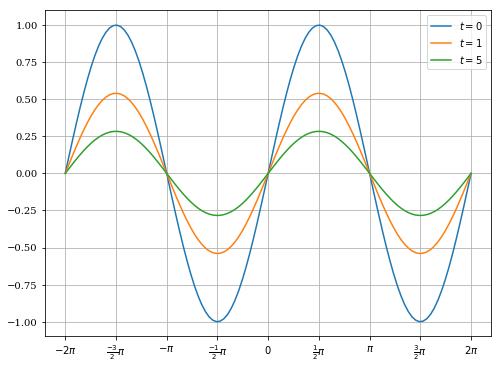

In [12]:
x = numpy.linspace(-2*numpy.pi, 2*numpy.pi, 111)

t0 = 0
t1 = 1
t2 = 5

fig, ax = pyplot.subplots(1, figsize=(8,6))

pyplot.plot(x, numpy.cos(t0)*numpy.sin(x), label='$t=0$')
pyplot.plot(x, numpy.cos(t1)*numpy.sin(x), label='$t=1$')
pyplot.plot(x, numpy.cos(t2)*numpy.sin(x), label='$t=5$')

#To plot ticks in terms of pi
ax.set_xticks([-2*numpy.pi, -1.5*numpy.pi, -numpy.pi,-0.5*numpy.pi, 0., 
                .5*numpy.pi, numpy.pi, 1.5*numpy.pi, 2*numpy.pi])
ax.set_xticklabels([r"$-2\pi$", r"$\frac{-3}{2}\pi$",r"$-\pi$",r"$\frac{-1}{2}\pi$",
                     "$0$", r"$\frac{1}{2}\pi$", r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])

pyplot.legend()
pyplot.grid();

Note that $u(\pi/2, t) =0$ for all $t$. This points are called **nodes** and they remain motionless. On the other hand, the points whose motion has maximum amplitude are name **ant-nodes**

Now if we take $m=2$, called the second harmonic, we can repeat the process and plot them, but let's make a function so we can call it multiple times.

In [13]:
def plot_harmonics(m, x, t):
    """ Plot the m-th harmonics of the function cos(mt)sin(mx)
    
    m : integer, number of harmonic desired.
    x : array, independant variable
    t : float or list, if it's a list will plot all the cases.
    
    """
    
    fig, ax = pyplot.subplots(1, figsize=(8,6))
    

    if (type(t) == float or type(t) == int):
        pyplot.plot(x, numpy.cos(m*t)*numpy.sin(m*x), label='$t={}$'.format(t))
    if type(t) == list:
        for ti in t:
            pyplot.plot(x, numpy.cos(m*ti)*numpy.sin(m*x), label='$t={}$'.format(ti))


    #To plot ticks in terms of pi
    ax.set_xticks([-2*numpy.pi, -1.5*numpy.pi, -numpy.pi,-0.5*numpy.pi, 0., 
                    .5*numpy.pi, numpy.pi, 1.5*numpy.pi, 2*numpy.pi])
    ax.set_xticklabels([r"$-2\pi$", r"$\frac{-3}{2}\pi$",r"$-\pi$",r"$\frac{-1}{2}\pi$",
                         "$0$", r"$\frac{1}{2}\pi$", r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])

    pyplot.legend()
    pyplot.grid()


Let's see what happens if we plot the second harmonic for `t=0`. What do you see, how does it change if we plot for an odd time? Discuss with your neighbor. 

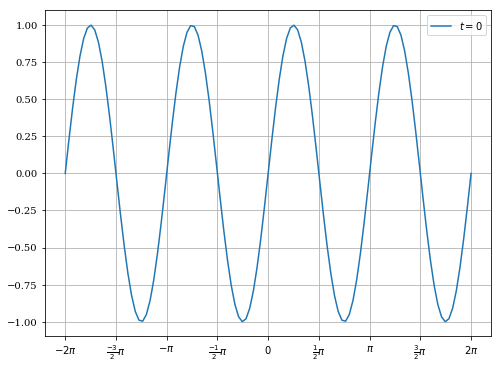

In [17]:
plot_harmonics(2, x, 0)

##### Exercise
Create a list of times, and use the `plot_harmonics` function to plot. If you read the docstrings, you'll notice that our function can accept lists. 

Higher values of $m$ get higher harmonics. As we increase $m$, the frequency increases, and the period $2\pi/m$ decreases. In other words, the fundamental tone has a lower frequency than higher harmonics. 

In [8]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())